### Simple Linear Regression with Real - World 2D Data: A Conceptual Explanation

#### 1. Understanding the Problem
Simple linear regression is a statistical method used to model the relationship between two variables: an independent variable ($x$) and a dependent variable ($y$). In the real world, we often encounter situations where we believe one variable can be used to predict another.

#### 2. Real - World Example: Predicting House Prices
Let's consider a real - world scenario where we want to predict the price of a house based on its size. Here, the size of the house (in square feet) is the independent variable ($x$), and the price of the house (in dollars) is the dependent variable ($y$).

#### 3. Data Collection
We need to collect data on a sample of houses. For each house in our sample, we record its size and its selling price. This data forms a set of 2D points, where each point $(x_i, y_i)$ represents the size and price of the $i$-th house in our sample.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# 初始化数据
# Generate Gaussian noise with mean 0 and standard deviation 15 for 10 data points
noise = np.random.normal(0, 15, 10)
print(noise)

# Add noise to the original house prices
data = {
    'House Size (sq. ft) ($x$)': 
    [1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500],
    # Add Gaussian noise to the house prices
   'House Price ($y$) (in thousands of dollars)': (
        np.array([180, 220, 260, 290, 320, 360, 400, 430, 460, 500]) 
        + noise  # Add the noise to the original house prices
    )
}

# 创建 DataFrame
df = pd.DataFrame(data)

#print the dataframe
print(df)

[ -9.9870182    4.46807506   3.86115519  12.79101722 -18.99857258
 -20.86106908  -9.86066203  15.54775643   7.55605686 -17.17028455]
   House Size (sq. ft) ($x$)  House Price ($y$) (in thousands of dollars)
0                       1200                                   170.012982
1                       1500                                   224.468075
2                       1800                                   263.861155
3                       2000                                   302.791017
4                       2200                                   301.001427
5                       2500                                   339.138931
6                       2800                                   390.139338
7                       3000                                   445.547756
8                       3200                                   467.556057
9                       3500                                   482.829715


visualize data

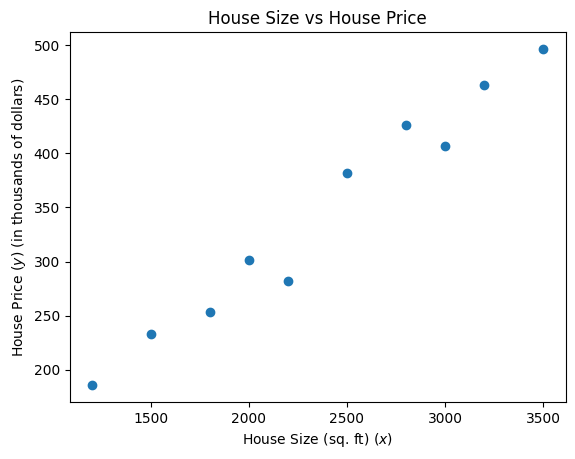

In [5]:

# 可视化数据
plt.scatter(df['House Size (sq. ft) ($x$)'], df['House Price ($y$) (in thousands of dollars)'])
plt.xlabel('House Size (sq. ft) ($x$)')
plt.ylabel('House Price ($y$) (in thousands of dollars)')
plt.title('House Size vs House Price')
plt.show()




#### 4. The Linear Regression Model
The goal of simple linear regression is to find a straight line that best fits the data points. The equation of a straight line is given by:

$y = \beta_0+\beta_1x+\epsilon$

where $\beta_0$ is the y - intercept (the value of $y$ when $x = 0$), $\beta_1$ is the slope of the line (indicating how much $y$ changes for a one - unit increase in $x$), and $\epsilon$ is the error term representing the difference between the observed value of $y$ and the value predicted by the line.

#### 5. Fitting the Model
To find the best - fitting line, we use a method called the least squares method. The least squares method minimizes the sum of the squared vertical distances (residuals) between the observed data points and the predicted values on the line.

The sum of squared residuals (SSR) is defined as:

$SSR=\sum_{i = 1}^{n}(y_i-\hat{y}_i)^2=\sum_{i = 1}^{n}(y_i - (\beta_0+\beta_1x_i))^2$

where $y_i$ is the observed value of the dependent variable for the $i$-th data point, $\hat{y}_i$ is the predicted value of the dependent variable for the $i$-th data point, and $n$ is the number of data points.

By taking the partial derivatives of $SSR$ with respect to $\beta_0$ and $\beta_1$ and setting them equal to zero, we can solve for the optimal values of $\beta_0$ and $\beta_1$ that minimize $SSR$.



create a linear regression model and fit it to the training data from dataframe



In [ ]:
# Prepare data for linear regression
X = df[['House Size (sq. ft) ($x$)']].values
y = df['House Price ($y$) (in thousands of dollars)'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

#print the model parameters
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])
print('Coefficients:', model.coef_)


Intercept: 17.793766582332523
Slope: 0.1372765548670356
Coefficients: [0.13727655]


visualize the fitted line on the plot.

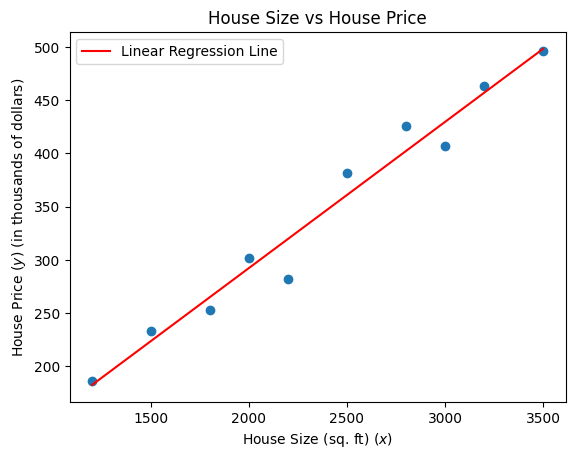

In [ ]:

# Predict values for visualization
 

x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
#  The linspace function generates 100 evenly spaced values between the
#  minimum and maximum values of the X array. This is useful for creating a
#  set of points to use for predictions.

#  The reshape method is used to change the shape of the resulting array.for plotting.
#  The -1 indicates that the number of rows should be inferred automatically
#  based on the length of the array, and 1 indicates that there should be one column.
#  The resulting array will have the shape (n_samples, n_features), where n_samples is 
# the number of elements in the original array.

x_pred = x_pred.reshape(-1, 1)

# Predict the house prices for the generated x values
#  The predict method of the model is used to generate predictions
#  for the generated x values.
y_pred = model.predict(x_pred)

# Visualize the data
plt.scatter(df['House Size (sq. ft) ($x$)'], df['House Price ($y$) (in thousands of dollars)'])
plt.plot(x_pred, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('House Size (sq. ft) ($x$)')
plt.ylabel('House Price ($y$) (in thousands of dollars)')
plt.title('House Size vs House Price')
plt.legend()
plt.show()


#### 6. Making Predictions
Once we have estimated the values of $\beta_0$ and $\beta_1$, we can use the regression line to make predictions. For a new house with a given size $x_{new}$, we can predict its price $\hat{y}_{new}$ using the equation:

$\hat{y}_{new}=\hat{\beta}_0+\hat{\beta}_1x_{new}$

where $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated values of $\beta_0$ and $\beta_1$.



Sum of Squared Residuals (SSR): 3277.156545028465


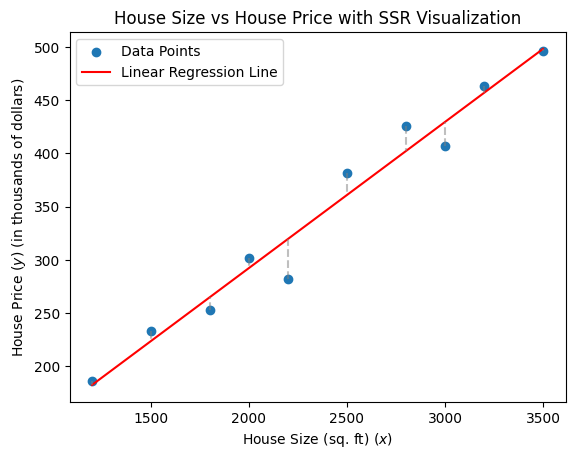

In [ ]:



# Predict values for the original data points
y_hat = model.predict(X)
# Calculate SSR
ssr = np.sum((y - y_hat) ** 2)
print(f"Sum of Squared Residuals (SSR): {ssr}")

# Visualize the data
plt.scatter(df['House Size (sq. ft) ($x$)'], 
            df['House Price ($y$) (in thousands of dollars)'],
              label='Data Points')
plt.plot(x_pred, y_pred, color='red', label='Linear Regression Line')

# Visualize residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_hat[i]], color='gray', 
             linestyle='--',     alpha=0.5)

plt.xlabel('House Size (sq. ft) ($x$)')
plt.ylabel('House Price ($y$) (in thousands of dollars)')
plt.title('House Size vs House Price with SSR Visualization')
plt.legend()
plt.show()

#### 7. Evaluating the Model
To evaluate how well our model fits the data, we can use several metrics:

- **Coefficient of Determination ($R^2$)**: It measures the proportion of the variance in the dependent variable that is predictable from the independent variable. An $R^2$ value close to 1 indicates that the model fits the data well, while a value close to 0 indicates a poor fit.
- **Residual Analysis**: We can analyze the residuals (the differences between the observed and predicted values) to check for patterns. If the residuals are randomly distributed around zero, it suggests that the model is a good fit. If there are patterns in the residuals, it may indicate that the model is misspecified.

In [9]:

# Print the intercept and slope of the fitted model
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Predict values for visualization
x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_pred)

# Predict values for the original data points
y_hat = model.predict(X)
# Calculate SSR
ssr = np.sum((y - y_hat) ** 2)
print(f"Sum of Squared Residuals (SSR): {ssr}")

# Calculate the Coefficient of Determination (R^2)
from sklearn.metrics import r2_score
r2 = r2_score(y, y_hat)
print(f"Coefficient of Determination (R^2): {r2}")

Intercept: 17.793766582332523
Slope: 0.1372765548670356
Sum of Squared Residuals (SSR): 3277.156545028465
Coefficient of Determination (R^2): 0.9675247186969517
